# Analysis

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from pathlib import Path
import seaborn as sns

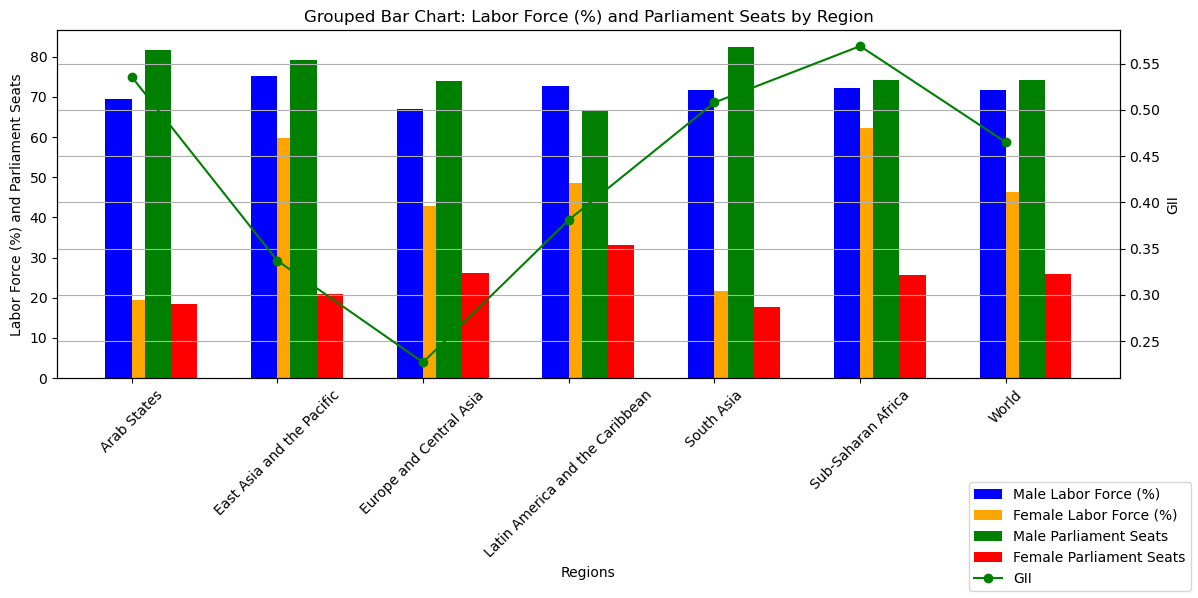

In [3]:
# Read data from CSV file
df = pd.read_csv('Resources/csv_tables/GII_regions.csv')

# Extract data from columns
regions = df['region']
gii = df['Gender Inequality Index']
parliament_seats_female = df['Share of seats in parliament, female (% held by women)']
parliament_seats_male = df['Share of seats in parliament, male (% held by men)']
labor_force_percentage_male = df['Labour force participation rate, male (% ages 15 and older']
labor_force_percentage_female = df['Labour force participation rate, female (% ages 15 and older)']

# Number of regions
num_regions = len(regions)

# Create an array of evenly spaced values to position the bars
x = np.arange(num_regions)

# Width of each bar
bar_width = 0.18

# Create the grouped bar chart for labor force percentages and parliament seats
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(x - bar_width/2, labor_force_percentage_male, width=bar_width, label='Male Labor Force (%)', color='blue')
ax1.bar(x + bar_width/2, labor_force_percentage_female, width=bar_width, label='Female Labor Force (%)', color='orange')
ax1.bar(x + bar_width, parliament_seats_male, width=bar_width, label='Male Parliament Seats', color='green')
ax1.bar(x + 2*bar_width, parliament_seats_female, width=bar_width, label='Female Parliament Seats', color='red')


# Adding labels and title for the primary y-axis
ax1.set_xlabel('Regions')
ax1.set_ylabel('Labor Force (%) and Parliament Seats', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Grouped Bar Chart: Labor Force (%) and Parliament Seats by Region')

# Create the secondary y-axis for GII
ax2 = ax1.twinx()
ax2.plot(x, gii, marker='o', color='green', label='GII')

# Adding labels and title for the secondary y-axis
ax2.set_ylabel('GII', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.xticks(x, regions)
plt.setp(ax1.get_xticklabels(), rotation=45)

# Display the legend
fig.legend(loc='lower right')

plt.savefig("Resources/images/GII_vs_labor_vs_parliament.png")

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


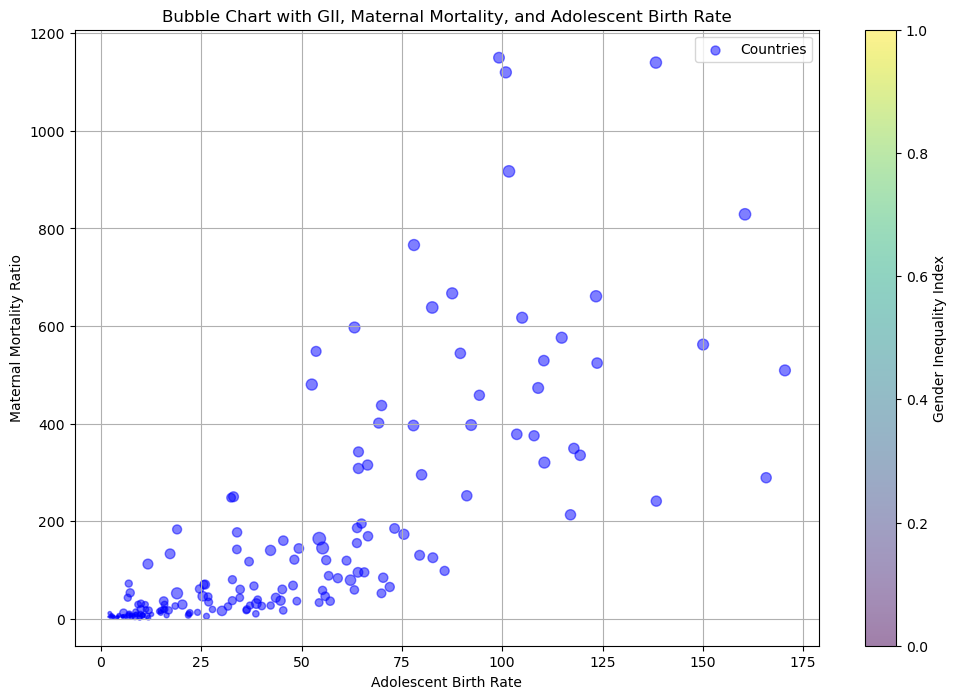

In [4]:
# Read data from CSV file
df = pd.read_csv('Resources/csv_tables/GII_countries.csv')

# Extract data from columns
gender_inequality_index = df['Gender Inequality Index']
maternal_mortality_ratio = df['Maternal Mortality Ratio (deaths per 100,000 live births)']
adolescent_birth_rate = df['Adolescent Birth Rate (births per 1,000 women ages 15-19)']

# Scaling the variables for bubble size
scaled_GII = gender_inequality_index * 100  # Adjust the scaling factor as needed
scaled_MMR = maternal_mortality_ratio * 0.1  # Adjust the scaling factor as needed

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(adolescent_birth_rate, maternal_mortality_ratio, s=scaled_GII, alpha=0.5, c='blue', label='Countries')

# Adding labels and title
plt.xlabel('Adolescent Birth Rate')
plt.ylabel('Maternal Mortality Ratio')
plt.title('Bubble Chart with GII, Maternal Mortality, and Adolescent Birth Rate')

# Adding a legend
plt.legend()

# Adding a colorbar to represent GII
plt.colorbar(label='Gender Inequality Index')

plt.savefig("Resources/images/GII_vs_Maternal_vs_Adolescent.png")

# Display the plot
plt.grid(True)
plt.show()


In [2]:
# Read CSV
HDI_2021 = pd.read_csv("csv tables/HDI_2021_countries.csv")

HDI_2021.head()

,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
0,AFG,Afghanistan,SA,Low,180.0,0.478,61.9824,10.263844,2.985070,1824.190915
1,AGO,Angola,SSA,Medium,148.0,0.586,61.6434,12.172100,5.417391,5465.617791
2,ALB,Albania,ECA,High,67.0,0.796,76.4626,14.448000,11.286455,14131.110390
3,AND,Andorra,NaN,Very High,40.0,0.858,80.3684,13.300239,10.555120,51166.626610
4,ARE,United Arab Emirates,AS,Very High,26.0,0.911,78.7104,15.717690,12.694030,62573.591810


In [3]:
# Collect the summarized data for the HDI components
HDI_2021.describe()

,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
count,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000
mean,95.811518,0.720576,71.31286,13.534658,8.986916,20249.088223
std,55.307333,0.150661,7.64596,2.923911,3.173693,21825.277076
min,1.000000,0.385000,52.52540,5.542510,2.114962,731.786709
25%,48.500000,0.599500,65.74720,11.601258,6.251659,4592.919612
50%,96.000000,0.739000,71.69400,13.404920,9.306864,12306.341000
75%,143.500000,0.835000,76.69930,15.623665,11.497702,30079.789725
max,191.000000,0.962000,85.47340,21.054590,14.090967,146829.700600


In [4]:
# Total Numbers of Countries
print(f"Total Number of Countries: {len(HDI_2021)}")

Total Number of Countries: 191


In [5]:
# Total Number of Countries in each level
HDI_by_level = HDI_2021.groupby("HDI_Code")['country'].count()
HDI_by_level

HDI_Code
High         49
Low          32
Medium       44
Very High    66
Name: country, dtype: int64

In [6]:
# Global Average HDI
global_avg_hdi = HDI_2021["Human Development Index 2021"].mean()
print(f"Global Average HDI: {global_avg_hdi}")

Global Average HDI: 0.7205759162303663


## HDI Components

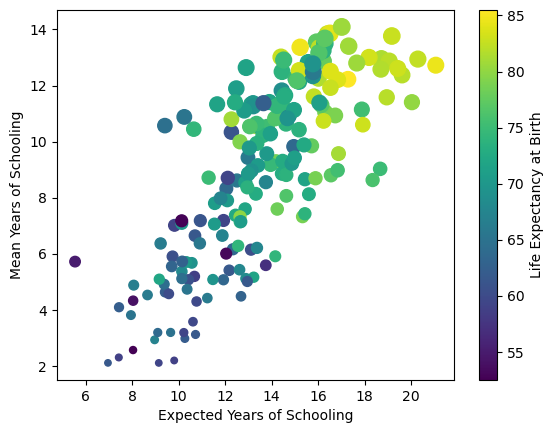

In [30]:
# plot the expected number of years and mean number of years of schooling for each country
Expected= HDI_2021['Expected Years of Schooling']
Mean=HDI_2021['Mean Years of Schooling']

plt.scatter(HDI_2021['Expected Years of Schooling'],HDI_2021['Mean Years of Schooling'],s=HDI_2021['Mean Years of Schooling']*10, c=HDI_2021['Life Expectancy at Birth'])
clb = plt.colorbar()
plt.xlabel("Expected Years of Schooling")
plt.ylabel("Mean Years of Schooling")
clb.set_label("Life Expectancy at Birth")
plt.savefig("Resources/images/Expected vs Mean Years of Schooling.png")
plt.show()

Looking into the HDI components around education and life expectancy we can see a clear relationship between the expected number years of school vs the mean number years of school in each country. We can see from the graph that the countries with more years of schooling are also the countries with the higher life expectancy at the time of birth. This visual acts as quanitative data to support HDI index calculations, suggesting that the more developed countries (the countries with a higher hdi index) are also the countries that are expected to be more educated and live the longest lives.

In [8]:
#Group the countries by their HDI level

Low= HDI_2021.loc[(HDI_2021["HDI_Code"]=="Low")]
Medium= HDI_2021.loc[(HDI_2021["HDI_Code"]=="Medium")]
High= HDI_2021.loc[(HDI_2021["HDI_Code"]=="High")]
very_high= HDI_2021.loc[(HDI_2021["HDI_Code"]=="Very High")]
very_high

,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
3,AND,Andorra,NaN,Very High,40.0,0.858,80.3684,13.300239,10.555120,51166.62661
4,ARE,United Arab Emirates,AS,Very High,26.0,0.911,78.7104,15.717690,12.694030,62573.59181
5,ARG,Argentina,LAC,Very High,47.0,0.842,75.3899,17.874870,11.147269,20925.26814
8,AUS,Australia,NaN,Very High,5.0,0.951,84.5265,21.054590,12.726820,49238.43335
9,AUT,Austria,NaN,Very High,25.0,0.916,81.5797,16.007959,12.256690,53618.67138
...,...,...,...,...,...,...,...,...,...,...
167,THA,Thailand,EAP,Very High,66.0,0.800,78.7154,15.882219,8.697120,17030.15352
172,TTO,Trinidad and Tobago,LAC,Very High,57.0,0.810,72.9709,14.535453,11.610624,23392.02084
174,TUR,Turkey,ECA,Very High,48.0,0.838,76.0324,18.338221,8.633140,31032.80106
179,URY,Uruguay,LAC,Very High,58.0,0.809,75.4356,16.832600,8.982550,21268.88122


In [9]:
#Assign isolated data as their own variables

le_low= Low['Life Expectancy at Birth']
gni_low=Low['Gross National Income Per Capita']
le_medium= Medium['Life Expectancy at Birth']
gni_medium=Medium['Gross National Income Per Capita']
le_high= High['Life Expectancy at Birth']
gni_high=High['Gross National Income Per Capita']
le_very_high= very_high['Life Expectancy at Birth']
gni_very_high=very_high['Gross National Income Per Capita']



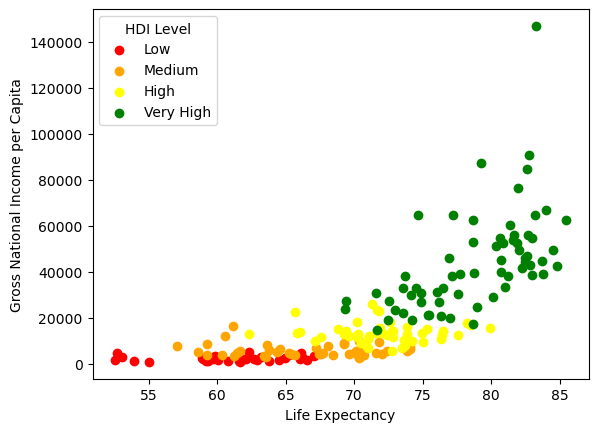

In [10]:
#Create single scatter plot with all the data
plt.scatter(le_low,gni_low, color="red")
plt.scatter(le_medium,gni_medium, color="orange")
plt.scatter(le_high,gni_high, color="yellow")
plt.scatter(le_very_high,gni_very_high, color="green")
plt.xlabel("Life Expectancy")
plt.ylabel("Gross National Income per Capita")
plt.legend(["Low", "Medium", "High", "Very High"], title= "HDI Level", loc="upper left")
plt.savefig("Resources/images/Life Expectancy vs GNI.png")
plt.show()

When comparing the life expectancy in each of the different levels of developing countries to the gross national income made per capita, we can see a wider spread in both categories of the developed countries (in green) then we do in any of the other levels. This graph can give us a clear picture of the diversity in the highly developed countries compared to the lack of diversity in the least developed countries. We can conclude that in the countries with highest income levels, we recognize the longest life expectancy. We also see that in the countries with a higher life expectancy, there is an exponential growth in the GNI per capita that people earn within that country.

## HDI vs IHDI

In [11]:
# Path to CSV file
file_path = Path("csv tables/IHDI_countries.csv")

# Read our HDI data into pandas
IHDI_2021 = pd.read_csv(file_path)
IHDI_2021

,iso3,country,HDI_Code,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,AGO,Angola,Medium,0.407,30.412168,30.546075,28.187733,34.17144,28.877330
1,ALB,Albania,High,0.710,10.767685,10.804020,6.790635,12.33344,13.178980
2,ARG,Argentina,Very High,0.720,13.837301,14.489311,7.624846,5.78729,28.099767
3,ARM,Armenia,High,0.688,9.136398,9.354414,7.035874,2.93495,17.438370
4,AUS,Australia,Very High,0.876,7.640183,7.886435,2.737980,3.05657,17.126000
...,...,...,...,...,...,...,...,...,...
151,WSM,Samoa,High,0.613,13.106588,13.295615,10.419724,7.02996,21.870080
152,YEM,Yemen,Low,0.307,31.543484,32.527473,26.689573,46.13765,21.803230
153,ZAF,South Africa,High,0.471,31.051127,33.941094,18.863251,17.29413,56.996000
154,ZMB,Zambia,Medium,0.390,30.109645,30.973451,25.052994,20.43572,44.840220


In [12]:
# Global Average IHDI
global_avg_ihdi = IHDI_2021["ihdi_2021"].mean()
print(f"Global Average IHDI: {global_avg_ihdi}")

Global Average IHDI: 0.5983397435897435


In [13]:
# Merge HDI and IHDI Dataframes
HDI_IHDI = pd.merge(HDI_2021.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_2021, on="iso3", how="inner")
HDI_IHDI.drop(columns=['country_y', 'HDI_Code_y'], inplace=True)
HDI_IHDI.rename(columns={'country_x':'country', 'HDI_Code_x':'HDI_Code'}, inplace=True)
HDI_IHDI

,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,AGO,Angola,SSA,Medium,148.0,0.586,0.407,30.412168,30.546075,28.187733,34.17144,28.877330
1,ALB,Albania,ECA,High,67.0,0.796,0.710,10.767685,10.804020,6.790635,12.33344,13.178980
2,ARG,Argentina,LAC,Very High,47.0,0.842,0.720,13.837301,14.489311,7.624846,5.78729,28.099767
3,ARM,Armenia,ECA,High,85.0,0.759,0.688,9.136398,9.354414,7.035874,2.93495,17.438370
4,AUS,Australia,NaN,Very High,5.0,0.951,0.876,7.640183,7.886435,2.737980,3.05657,17.126000
...,...,...,...,...,...,...,...,...,...,...,...,...
151,WSM,Samoa,EAP,High,111.0,0.707,0.613,13.106588,13.295615,10.419724,7.02996,21.870080
152,YEM,Yemen,AS,Low,183.0,0.455,0.307,31.543484,32.527473,26.689573,46.13765,21.803230
153,ZAF,South Africa,SSA,High,109.0,0.713,0.471,31.051127,33.941094,18.863251,17.29413,56.996000
154,ZMB,Zambia,SSA,Medium,154.0,0.565,0.390,30.109645,30.973451,25.052994,20.43572,44.840220


In [14]:
HDI_IHDI.describe()

,HDI_Rank,Human Development Index 2021,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
count,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,96.326923,0.718654,0.59834,18.198765,18.620778,13.239996,18.592524,22.763774
std,57.119700,0.156470,0.18909,9.616045,9.832034,10.005648,14.894912,9.772462
min,1.000000,0.385000,0.24000,4.371242,4.357298,1.954472,1.255630,8.305240
25%,46.750000,0.593000,0.43050,9.765972,10.019681,4.198163,5.373880,16.445524
50%,96.500000,0.735000,0.60050,16.935414,17.124084,9.972488,13.565415,20.884745
75%,146.000000,0.843000,0.75825,26.155529,26.809880,20.460362,30.856628,28.096537
max,191.000000,0.962000,0.91500,43.069009,44.444444,39.606491,50.124110,56.996000


The correlation coefficient: 0.9842576175238826


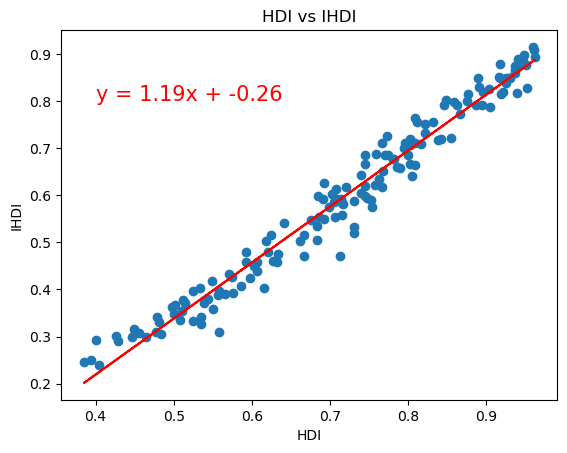

In [15]:
# Scatter Plot of HDI vs IHDI
x_values = HDI_IHDI['Human Development Index 2021']
y_values = HDI_IHDI['ihdi_2021']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,0.8),fontsize=15,color="red")
plt.xlabel('HDI')
plt.ylabel('IHDI')
plt.title('HDI vs IHDI')
print(f"The correlation coefficient: {rvalue}")
plt.savefig("Resources/images/HDI vs IHDI.png")
plt.show()

The correlation coefficient: -0.8910916971621982


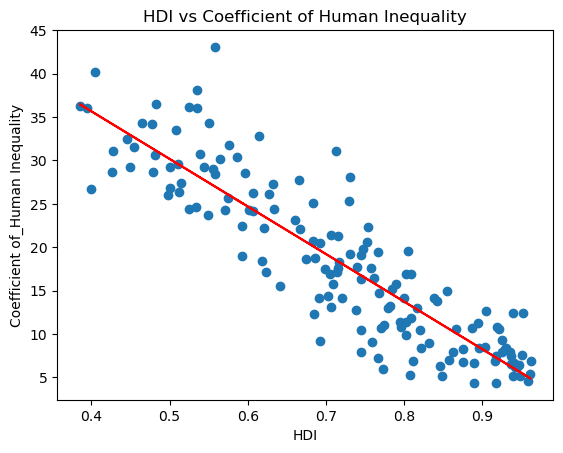

In [16]:
# Scatter Plot of HDI vs IHDI
x_values = HDI_IHDI['Human Development Index 2021']
y_values = HDI_IHDI['Coefficient_of_Human Inequality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,0.8),fontsize=15,color="red")
plt.xlabel('HDI')
plt.ylabel('Coefficient of_Human Inequality')
plt.title('HDI vs Coefficient of Human Inequality')
print(f"The correlation coefficient: {rvalue}")
plt.savefig("Resources/images/HDI vs Coefficient of Human Inequality.png")
plt.show()

The correlation coefficient for Inequality in life expectancy is: -0.9220353685843389
The correlation coefficient for Inequality in education is: -0.8317160375808982
The correlation coefficient for Inequality in income is: -0.418772074620578


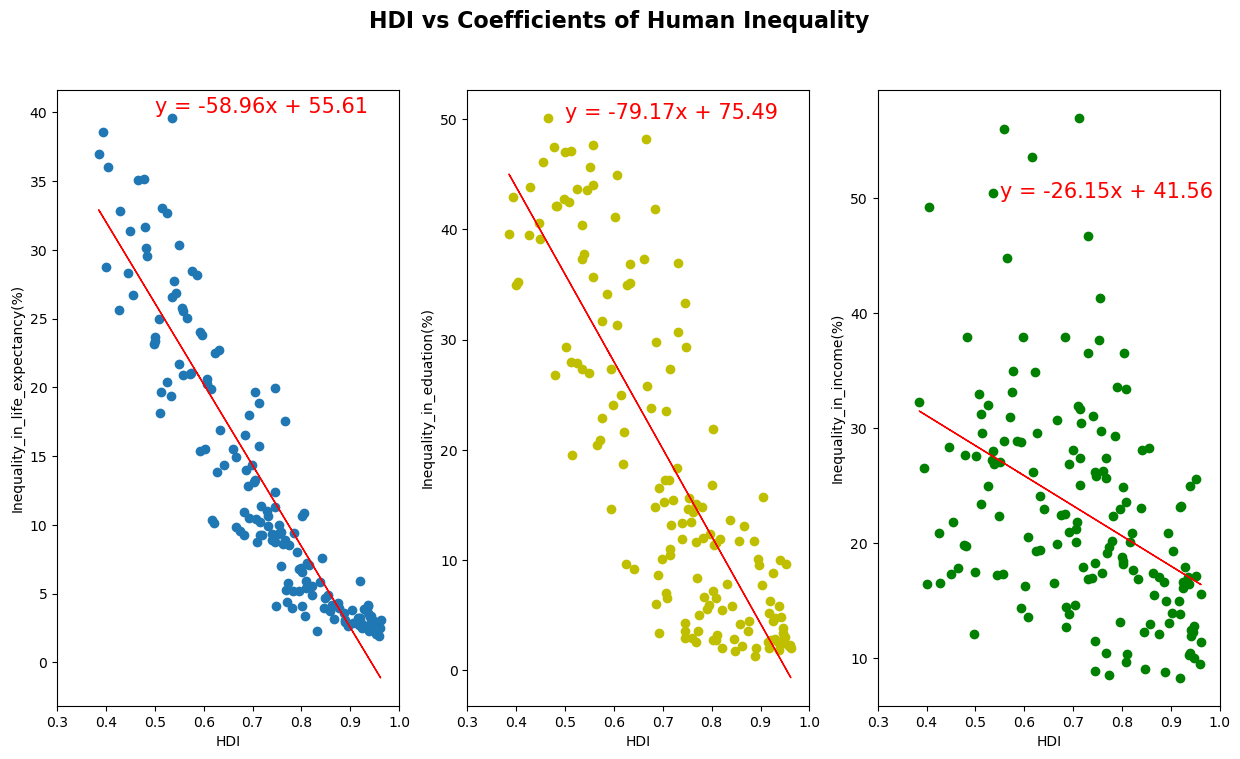

In [17]:
# Generate a facet plot for HDI vs coefficient of Human Inequality for each HDI component
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, figsize=(15,8))
fig.suptitle("HDI vs Coefficients of Human Inequality", fontsize=16, fontweight="bold")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_life_expectancy(%)'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.set_xlim(0.3, 1)
ax1.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_life_expectancy(%)'], linewidth=1, marker="o")
ax1.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax1.annotate(line_eq,(0.5,40),fontsize=15,color="red")
ax1.set_ylabel("Inequality_in_life_expectancy(%)")
ax1.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in life expectancy is: {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_eduation(%)'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_eduation(%)'], linewidth=1, marker="o", color="y")
ax2.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax2.annotate(line_eq,(0.5,50),fontsize=15,color="red")
ax2.set_ylabel("Inequality_in_eduation(%)")
ax2.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in education is: {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_income(%)'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax3.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality_in_income(%)'], linewidth=1, marker="o", color="g")
ax3.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax3.annotate(line_eq,(0.55,50),fontsize=15,color="red")
ax3.set_ylabel("Inequality_in_income(%)")
ax3.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in income is: {rvalue}") 

plt.savefig("Resources/images/HDI vs Coefficients of Human Inequality.png")
plt.show()

In [18]:
# Merge HDI by Level and IHDI Dataframes
HDI_IHDI_Low = pd.merge(Low.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_2021, on="iso3", how="inner")
HDI_IHDI_Low.drop(columns=['country_y', 'HDI_Code_y'], inplace=True)
HDI_IHDI_Low.rename(columns={'country_x':'country', 'HDI_Code_x':'HDI_Code'}, inplace=True)

HDI_IHDI_Medium = pd.merge(Medium.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_2021, on="iso3", how="inner")
HDI_IHDI_Medium.drop(columns=['country_y', 'HDI_Code_y'], inplace=True)
HDI_IHDI_Medium.rename(columns={'country_x':'country', 'HDI_Code_x':'HDI_Code'}, inplace=True)

HDI_IHDI_High = pd.merge(High.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_2021, on="iso3", how="inner")
HDI_IHDI_High.drop(columns=['country_y', 'HDI_Code_y'], inplace=True)
HDI_IHDI_High.rename(columns={'country_x':'country', 'HDI_Code_x':'HDI_Code'}, inplace=True)

HDI_IHDI_Very_High = pd.merge(very_high.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_2021, on="iso3", how="inner")
HDI_IHDI_Very_High.drop(columns=['country_y', 'HDI_Code_y'], inplace=True)
HDI_IHDI_Very_High.rename(columns={'country_x':'country', 'HDI_Code_x':'HDI_Code'}, inplace=True)



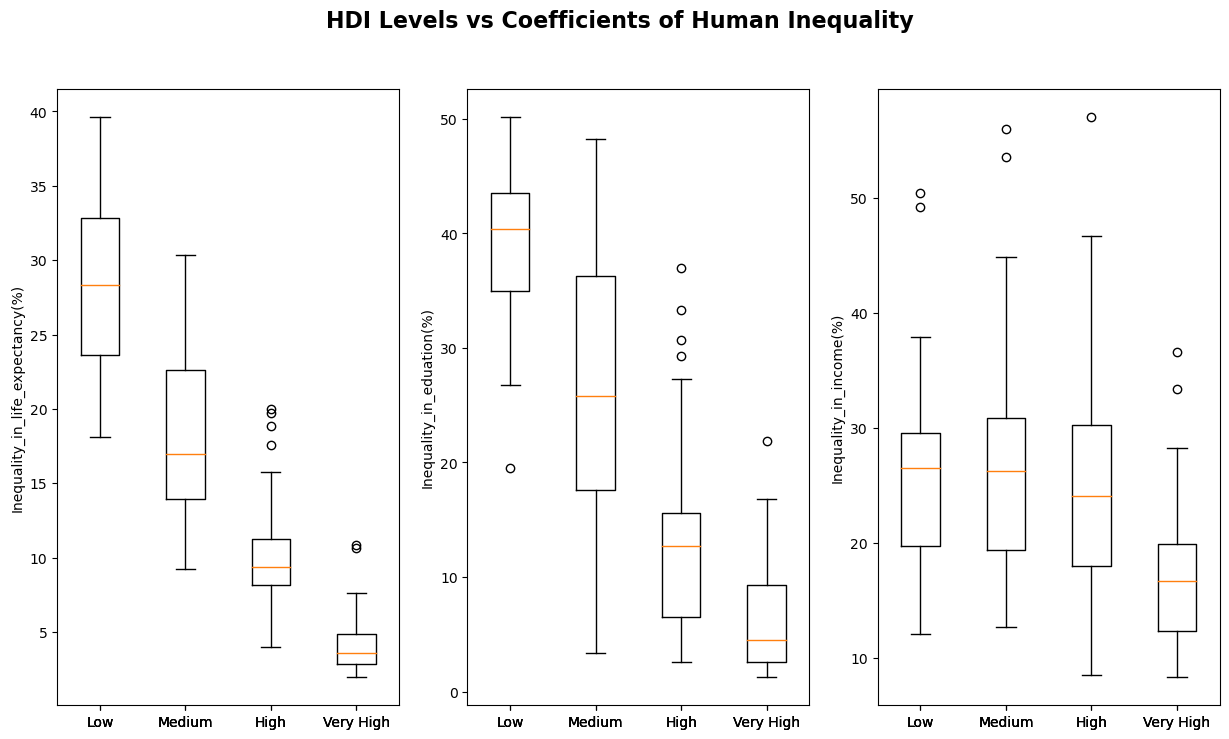

In [19]:
# Generate a Box Plot for HDI Levels vs coefficient of Human Inequality for each HDI component
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, figsize=(15,8))
fig.suptitle("HDI Levels vs Coefficients of Human Inequality", fontsize=16, fontweight="bold")

ax1.boxplot([HDI_IHDI_Low['Inequality_in_life_expectancy(%)'], HDI_IHDI_Medium['Inequality_in_life_expectancy(%)'], HDI_IHDI_High['Inequality_in_life_expectancy(%)'], HDI_IHDI_Very_High['Inequality_in_life_expectancy(%)']], labels=['Low', 'Medium', 'High', 'Very High'])
ax1.set_ylabel("Inequality_in_life_expectancy(%)")

ax2.boxplot([HDI_IHDI_Low['Inequality_in_eduation(%)'], HDI_IHDI_Medium['Inequality_in_eduation(%)'], HDI_IHDI_High['Inequality_in_eduation(%)'], HDI_IHDI_Very_High['Inequality_in_eduation(%)']], labels=['Low', 'Medium', 'High', 'Very High'])
ax2.set_ylabel("Inequality_in_eduation(%)")

ax3.boxplot([HDI_IHDI_Low['Inequality_in_income(%)'], HDI_IHDI_Medium['Inequality_in_income(%)'], HDI_IHDI_High['Inequality_in_income(%)'], HDI_IHDI_Very_High['Inequality_in_income(%)']], labels=['Low', 'Medium', 'High', 'Very High'])
ax3.set_ylabel("Inequality_in_income(%)")


plt.savefig("Resources/images/HDI Levels vs Coefficients of Human Inequality.png")
plt.show()

## Devepoling Regions Analysis

In [20]:
# Path to CSV file
file_path = Path("csv tables/HDI_2021_regions.csv")

# Read our HDI data into pandas
HDI_regions_2021 = pd.read_csv(file_path)
HDI_regions_2021

,iso3,region,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
0,ZZE.AS,Arab States,0.708,70.895040,12.353535,8.028550,13500.556150
1,ZZF.EAP,East Asia and the Pacific,0.749,75.579650,13.816818,7.839329,15580.436860
2,ZZG.ECA,Europe and Central Asia,0.796,72.856526,15.446546,10.553922,19351.837020
3,ZZH.LAC,Latin America and the Caribbean,0.754,72.099890,14.767956,8.997700,14520.661240
4,ZZI.SA,South Asia,0.632,67.855530,11.562208,6.710321,6481.393135
5,ZZJ.SSA,Sub-Saharan Africa,0.547,60.112467,10.267338,6.001639,3698.868914
6,ZZK.WORLD,World,0.732,71.365465,12.780907,8.617461,16752.082920


In [21]:
# Path to CSV file
file_path = Path("csv tables/IHDI_regions.csv")

# Read our IHDI data into pandas
IHDI_regions_2021 = pd.read_csv(file_path)
IHDI_regions_2021.rename(columns={"ihdi_2021": "Inequality_HDI_2021"}, inplace=True)
IHDI_regions_2021

,iso3,region,Inequality_HDI_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,ZZE.AS,Arab States,0.534,24.188601,24.576271,14.114357,33.130224,25.321222
1,ZZF.EAP,East Asia and the Pacific,0.630,15.537360,15.887850,7.880201,13.361987,25.369893
2,ZZG.ECA,Europe and Central Asia,0.714,10.277559,10.301508,7.317009,6.966866,16.548802
3,ZZH.LAC,Latin America and the Caribbean,0.601,19.608799,20.291777,10.093223,14.802601,33.930573
4,ZZI.SA,South Asia,0.476,24.251594,24.683544,17.637374,36.242215,18.875191
5,ZZJ.SSA,Sub-Saharan Africa,0.383,29.903424,29.981718,28.309306,34.266790,27.134176
6,ZZK.WORLD,World,0.590,19.358854,19.398907,13.182837,21.693417,23.200307


In [22]:
# Path to CSV file
file_path = Path("csv tables/HDI_regions.csv")

# Read our HDI Trends data into pandas
HDI_regions_trends = pd.read_csv(file_path)
HDI_regions_trends

,iso3,region,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,ZZE.AS,Arab States,0.683,0.688,0.689,0.692,0.697,0.701,0.706,0.711,0.715,0.708,0.708
1,ZZF.EAP,East Asia and the Pacific,0.692,0.700,0.707,0.715,0.722,0.728,0.734,0.741,0.748,0.748,0.749
2,ZZG.ECA,Europe and Central Asia,0.754,0.760,0.772,0.778,0.783,0.788,0.794,0.798,0.802,0.793,0.796
3,ZZH.LAC,Latin America and the Caribbean,0.740,0.744,0.753,0.756,0.758,0.761,0.763,0.766,0.768,0.755,0.754
4,ZZI.SA,South Asia,0.587,0.596,0.603,0.614,0.623,0.633,0.638,0.640,0.641,0.638,0.632
5,ZZJ.SSA,Sub-Saharan Africa,0.510,0.516,0.523,0.529,0.534,0.539,0.542,0.547,0.552,0.549,0.547
6,ZZK.WORLD,World,0.704,0.709,0.714,0.720,0.724,0.729,0.733,0.736,0.739,0.735,0.732


In [23]:
# Path to CSV file
file_path = Path("csv tables/IHDI_regions_index.csv")

# Read our IHDI Trends data into pandas
IHDI_regions_trends = pd.read_csv(file_path)
IHDI_regions_trends

,iso3,region,ihdi_2011,ihdi_2012,ihdi_2013,ihdi_2014,ihdi_2015,ihdi_2016,ihdi_2017,ihdi_2018,ihdi_2019,ihdi_2020,ihdi_2021
0,ZZE.AS,Arab States,0.511,0.503,0.514,0.515,0.520,0.525,0.531,0.534,0.538,0.534,0.534
1,ZZF.EAP,East Asia and the Pacific,0.578,0.589,0.589,0.597,0.604,0.609,0.614,0.620,0.627,0.629,0.630
2,ZZG.ECA,Europe and Central Asia,0.656,0.668,0.683,0.690,0.697,0.702,0.708,0.713,0.717,0.710,0.714
3,ZZH.LAC,Latin America and the Caribbean,0.571,0.578,0.587,0.595,0.598,0.601,0.606,0.609,0.612,0.602,0.601
4,ZZI.SA,South Asia,0.418,0.426,0.432,0.444,0.459,0.468,0.472,0.476,0.480,0.479,0.476
5,ZZJ.SSA,Sub-Saharan Africa,0.342,0.350,0.356,0.361,0.366,0.370,0.375,0.379,0.384,0.383,0.383
6,ZZK.WORLD,World,0.556,0.562,0.566,0.572,0.578,0.583,0.586,0.590,0.594,0.591,0.590


In [24]:
# Merge HDI and IHDI dataframes
HDI_vs_IHDI_regions = pd.merge(HDI_regions_2021, IHDI_regions_2021, on="region", how="inner")
HDI_vs_IHDI_regions.drop(columns=['iso3_y'], inplace=True)
HDI_vs_IHDI_regions.rename(columns={'iso3_x':'iso3'}, inplace=True)
HDI_vs_IHDI_regions

,iso3,region,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita,Inequality_HDI_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,ZZE.AS,Arab States,0.708,70.895040,12.353535,8.028550,13500.556150,0.534,24.188601,24.576271,14.114357,33.130224,25.321222
1,ZZF.EAP,East Asia and the Pacific,0.749,75.579650,13.816818,7.839329,15580.436860,0.630,15.537360,15.887850,7.880201,13.361987,25.369893
2,ZZG.ECA,Europe and Central Asia,0.796,72.856526,15.446546,10.553922,19351.837020,0.714,10.277559,10.301508,7.317009,6.966866,16.548802
3,ZZH.LAC,Latin America and the Caribbean,0.754,72.099890,14.767956,8.997700,14520.661240,0.601,19.608799,20.291777,10.093223,14.802601,33.930573
4,ZZI.SA,South Asia,0.632,67.855530,11.562208,6.710321,6481.393135,0.476,24.251594,24.683544,17.637374,36.242215,18.875191
5,ZZJ.SSA,Sub-Saharan Africa,0.547,60.112467,10.267338,6.001639,3698.868914,0.383,29.903424,29.981718,28.309306,34.266790,27.134176
6,ZZK.WORLD,World,0.732,71.365465,12.780907,8.617461,16752.082920,0.590,19.358854,19.398907,13.182837,21.693417,23.200307


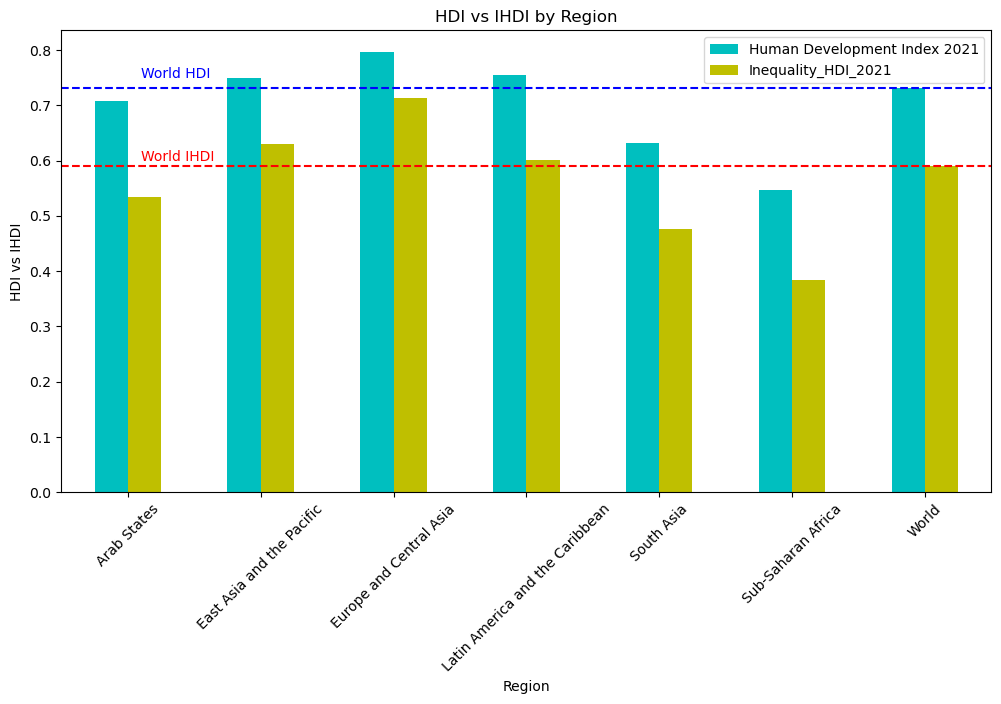

In [25]:
# Grouped bar chart of HDI vs IHDI
HDI_vs_IHDI_regions.plot.bar(x="region", y=["Human Development Index 2021", "Inequality_HDI_2021"], figsize=(12,6), color=["c", "y"], rot=45)
plt.title("HDI vs IHDI by Region")
plt.xlabel("Region")
plt.ylabel("HDI vs IHDI")
plt.axhline(y=HDI_vs_IHDI_regions.loc[6, "Human Development Index 2021"], color="b", linestyle="--", label="World HDI")
plt.axhline(y=HDI_vs_IHDI_regions.loc[6, "Inequality_HDI_2021"], color="r", linestyle="--", label="World IHDI")
plt.text(0.1, 0.75, "World HDI", fontsize=10, color="b")
plt.text(0.1, 0.6, "World IHDI", fontsize=10, color="r")
plt.savefig("Resources/images/HDI vs IHDI by Region.png")
plt.show()

In [26]:
# Merge HDI and IHDI Trends dataframes
HDI_vs_IHDI_trends_regions = pd.merge(HDI_regions_trends, IHDI_regions_trends, on="region", how="inner")
# Drop extra column
HDI_vs_IHDI_trends_regions.drop(columns=["iso3_y"], inplace=True)

# Rename columns
HDI_vs_IHDI_trends_regions.rename(columns={"iso3_x": "iso3"}, inplace=True)

HDI_vs_IHDI_trends_regions

,iso3,region,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,...,ihdi_2012,ihdi_2013,ihdi_2014,ihdi_2015,ihdi_2016,ihdi_2017,ihdi_2018,ihdi_2019,ihdi_2020,ihdi_2021
0,ZZE.AS,Arab States,0.683,0.688,0.689,0.692,0.697,0.701,0.706,0.711,...,0.503,0.514,0.515,0.520,0.525,0.531,0.534,0.538,0.534,0.534
1,ZZF.EAP,East Asia and the Pacific,0.692,0.700,0.707,0.715,0.722,0.728,0.734,0.741,...,0.589,0.589,0.597,0.604,0.609,0.614,0.620,0.627,0.629,0.630
2,ZZG.ECA,Europe and Central Asia,0.754,0.760,0.772,0.778,0.783,0.788,0.794,0.798,...,0.668,0.683,0.690,0.697,0.702,0.708,0.713,0.717,0.710,0.714
3,ZZH.LAC,Latin America and the Caribbean,0.740,0.744,0.753,0.756,0.758,0.761,0.763,0.766,...,0.578,0.587,0.595,0.598,0.601,0.606,0.609,0.612,0.602,0.601
4,ZZI.SA,South Asia,0.587,0.596,0.603,0.614,0.623,0.633,0.638,0.640,...,0.426,0.432,0.444,0.459,0.468,0.472,0.476,0.480,0.479,0.476
5,ZZJ.SSA,Sub-Saharan Africa,0.510,0.516,0.523,0.529,0.534,0.539,0.542,0.547,...,0.350,0.356,0.361,0.366,0.370,0.375,0.379,0.384,0.383,0.383
6,ZZK.WORLD,World,0.704,0.709,0.714,0.720,0.724,0.729,0.733,0.736,...,0.562,0.566,0.572,0.578,0.583,0.586,0.590,0.594,0.591,0.590


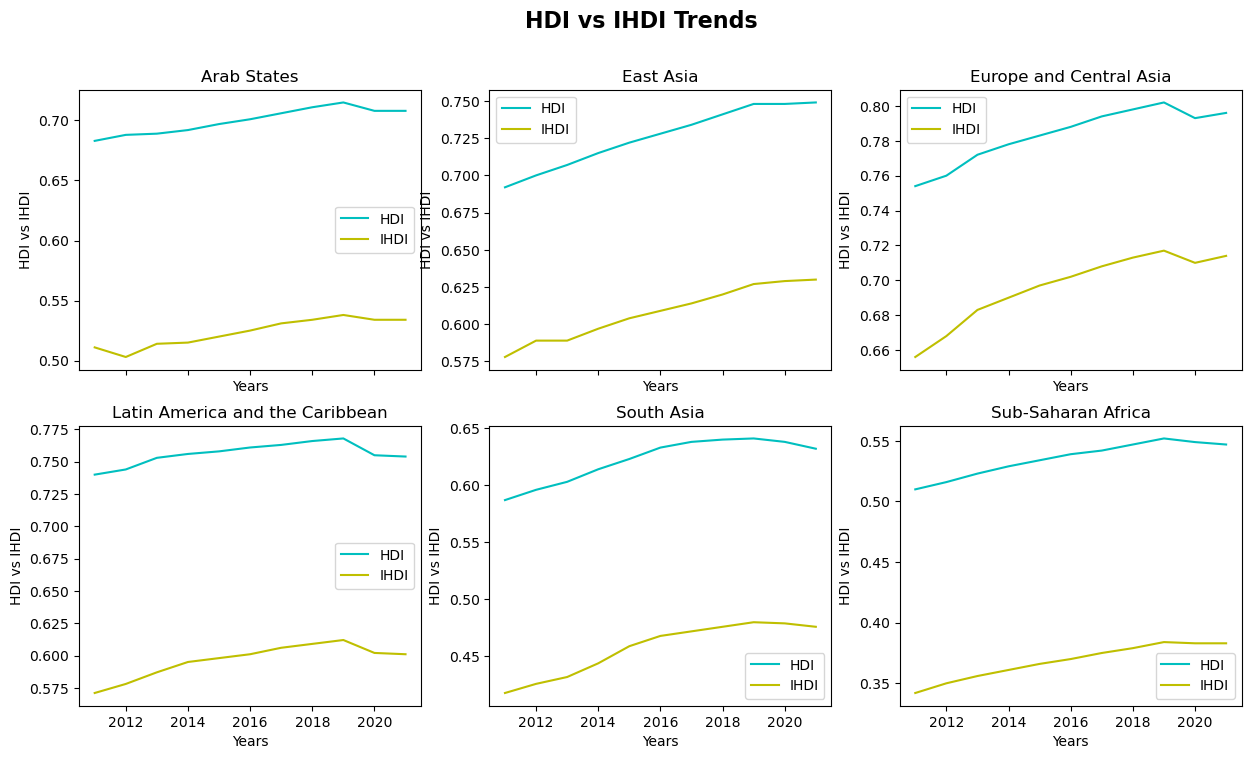

In [27]:
# Generate a facet plot for HDI vs IHDI Trends for each region
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021]
fig, axs = plt.subplots(2,3, sharex=True, figsize=(15,8))
fig.suptitle("HDI vs IHDI Trends",fontsize=16, fontweight="bold")

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[0,2]
ax4 = axs[1,0]
ax5 = axs[1,1]
ax6 = axs[1,2]


ax1.plot(years, HDI_vs_IHDI_trends_regions.iloc[0, 2:13], color="c", label="HDI")
ax1.plot(years, HDI_vs_IHDI_trends_regions.iloc[0, 13:24], color="y", label="IHDI")
ax1.set_title("Arab States")
ax1.set_xlabel("Years")
ax1.set_ylabel("HDI vs IHDI")
ax1.legend(loc="best")

ax2.plot(years, HDI_vs_IHDI_trends_regions.iloc[1, 2:13], color="c", label="HDI")
ax2.plot(years, HDI_vs_IHDI_trends_regions.iloc[1, 13:24], color="y", label="IHDI")
ax2.set_title("East Asia")
ax2.set_xlabel("Years")
ax2.set_ylabel("HDI vs IHDI")
ax2.legend(loc="best")

ax3.plot(years, HDI_vs_IHDI_trends_regions.iloc[2, 2:13], color="c", label="HDI")
ax3.plot(years, HDI_vs_IHDI_trends_regions.iloc[2, 13:24], color="y", label="IHDI")
ax3.set_title("Europe and Central Asia")
ax3.set_xlabel("Years")
ax3.set_ylabel("HDI vs IHDI")
ax3.legend(loc="best")

ax4.plot(years, HDI_vs_IHDI_trends_regions.iloc[3, 2:13], color="c", label="HDI")
ax4.plot(years, HDI_vs_IHDI_trends_regions.iloc[3, 13:24], color="y", label="IHDI")
ax4.set_title("Latin America and the Caribbean")
ax4.set_xlabel("Years")
ax4.set_ylabel("HDI vs IHDI")
ax4.legend(loc="best")

ax5.plot(years, HDI_vs_IHDI_trends_regions.iloc[4, 2:13], color="c", label="HDI")
ax5.plot(years, HDI_vs_IHDI_trends_regions.iloc[4, 13:24], color="y", label="IHDI")
ax5.set_title("South Asia")
ax5.set_xlabel("Years")
ax5.set_ylabel("HDI vs IHDI")
ax5.legend(loc="best")

ax6.plot(years, HDI_vs_IHDI_trends_regions.iloc[5, 2:13], color="c", label="HDI")
ax6.plot(years, HDI_vs_IHDI_trends_regions.iloc[5, 13:24], color="y", label="IHDI")
ax6.set_title("Sub-Saharan Africa")
ax6.set_xlabel("Years")
ax6.set_ylabel("HDI vs IHDI")
ax6.legend(loc="best")

plt.show()

In [28]:
# Create a dataframe for HDI by regions vs IHDI coeeficients for Ploting purposes
plot_df = pd.DataFrame({"region": HDI_vs_IHDI_regions["region"],
                        "HDI": HDI_vs_IHDI_regions["Human Development Index 2021"],
                        "Inequality_in_life_expectancy": HDI_vs_IHDI_regions["Inequality_in_life_expectancy(%)"]/100,
                        "Inequality_in_eduation": HDI_vs_IHDI_regions["Inequality_in_eduation(%)"]/100,
                        "Inequality_in_income": HDI_vs_IHDI_regions["Inequality_in_income(%)"]/100})
plot_df

,region,HDI,Inequality_in_life_expectancy,Inequality_in_eduation,Inequality_in_income
0,Arab States,0.708,0.141144,0.331302,0.253212
1,East Asia and the Pacific,0.749,0.078802,0.133620,0.253699
2,Europe and Central Asia,0.796,0.073170,0.069669,0.165488
3,Latin America and the Caribbean,0.754,0.100932,0.148026,0.339306
4,South Asia,0.632,0.176374,0.362422,0.188752
5,Sub-Saharan Africa,0.547,0.283093,0.342668,0.271342
6,World,0.732,0.131828,0.216934,0.232003


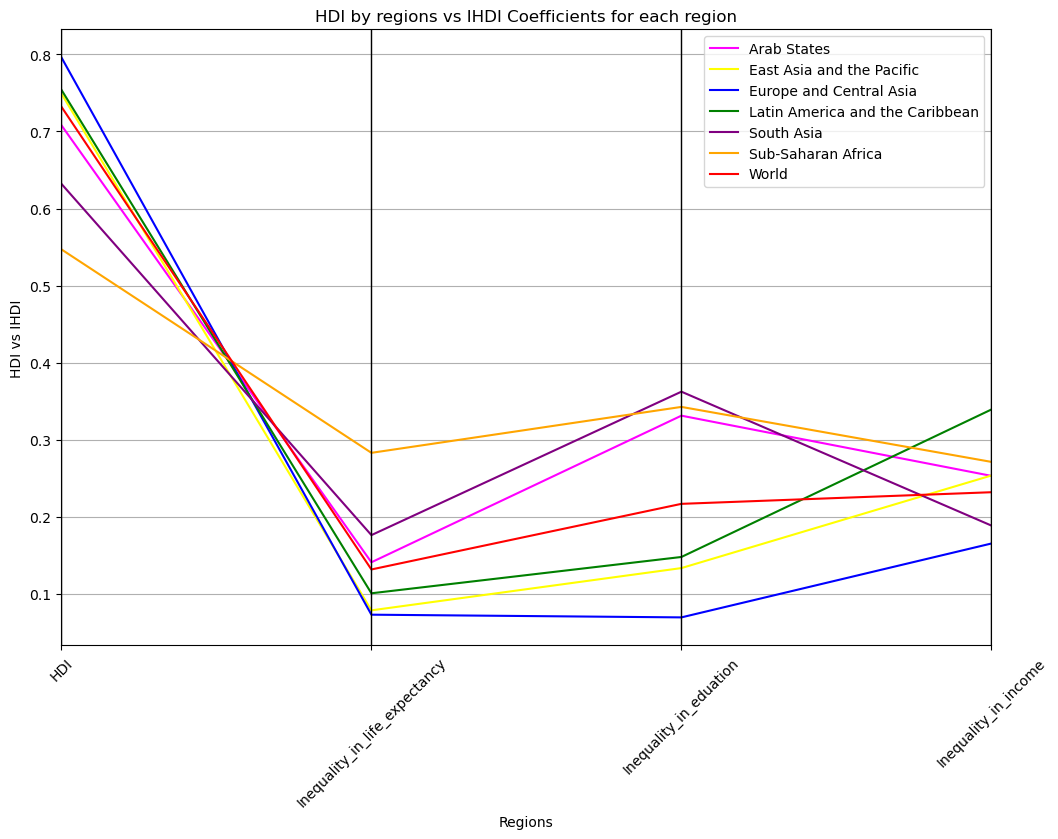

<Figure size 2000x1000 with 0 Axes>

In [29]:
# Create Parallel Coordinates Plot for HDI by regions vs IHDI Coefficients for each region
plt.figure(figsize=(12,8))
pd.plotting.parallel_coordinates(plot_df, 'region', color=('magenta', 'yellow', 'blue', 'green', 'purple', 'orange', 'red'))
plt.title("HDI by regions vs IHDI Coefficients for each region")
plt.xlabel("Regions")
plt.ylabel("HDI vs IHDI")
plt.xticks(rotation=45)
plt.figure(figsize=(20,10))
plt.savefig("Resources/images/HDI by regions vs IHDI Coefficients for each region.png")
plt.show()